In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

# Problem 1
# Wholesale Customers Analysis 

Problem Statement:\
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


In [2]:
wholesale = pd.read_csv('Wholesale+Customers+Data.csv')
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wholesale.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

There are no missing values in the dataset

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [3]:
wholesale['Total']=wholesale['Fresh']+wholesale['Milk']+wholesale['Grocery']+wholesale['Frozen']+wholesale['Detergents_Paper']+wholesale['Delicatessen']
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [4]:
wholesale_region=pd.DataFrame(wholesale.groupby('Region').sum()['Total'])
wholesale_region.reset_index()
wholesale_region.to_excel('C:\\Users\\sireesha\\PGDSBA Course\\GL module-2 (Statistical methods for decision making).xlsx',index=False)

In [100]:
wholesale00=wholesale.copy()
wholesale10=wholesale00.drop('Total',axis=1)
wholesale10
wholesale10.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [30]:
w1=pd.DataFrame(wholesale.groupby('Region').sum()['Total'])
w1.reset_index()

,Region,Total
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


Text(0.5, 1.0, 'Regionwise spendings')

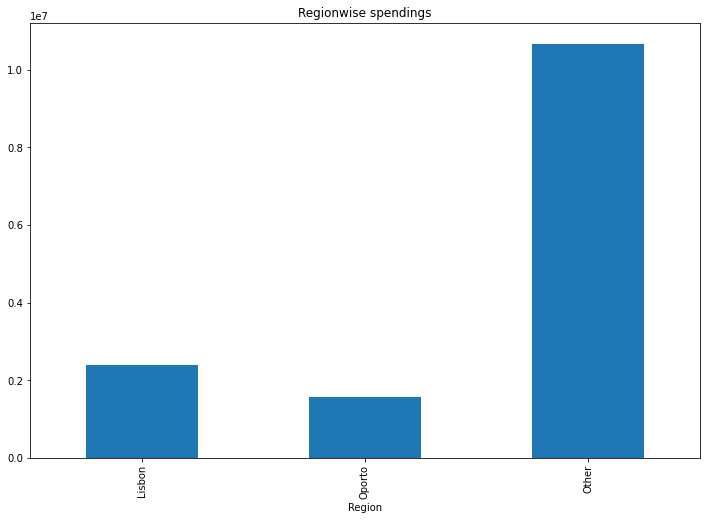

In [34]:
plt.figure(figsize=(12,8))
wholesale.groupby('Region').sum()['Total'].plot(kind='bar')
plt.title('Regionwise spendings')

In [39]:
w2=pd.DataFrame(wholesale.groupby('Channel').sum()['Total'])
w2.reset_index()

,Channel,Total
0,Hotel,7999569
1,Retail,6619931


Text(0.5, 1.0, 'Channelwise spendings')

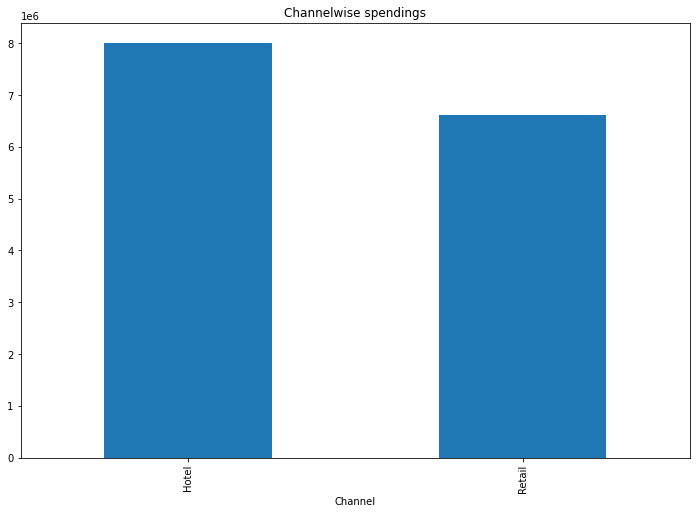

In [40]:
plt.figure(figsize=(12,8))
wholesale.groupby('Channel').sum()['Total'].plot(kind='bar')
plt.title('Channelwise spendings')
sns.barplot()

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [8]:
wholesale['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [23]:
wh_region=wholesale.groupby('Region').sum()
wh_region
wh_region1=wh_region.drop('Buyer/Spender',axis=1)
wh_region1
wh_region1.reset_index(inplace=True)
wh_region1

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


Text(0.5, 1.0, 'Regionwise spendings on 6 varities of items')

<Figure size 1440x576 with 0 Axes>

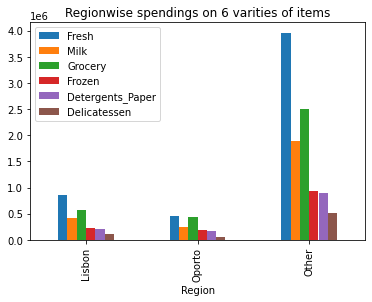

In [6]:
wholesale11=wholesale.drop('Buyer/Spender',axis=1)
wholesale12=wholesale11.drop('Total',axis=1)
plt.figure(figsize=(20,8))
wholesale12.groupby('Region').sum().plot(kind='bar')
plt.title('Regionwise spendings on 6 varities of items')

In [30]:
wh_channel= wholesale.groupby('Channel').sum()
wh_channel1=wh_channel.drop('Buyer/Spender',axis=1)
wh_channel1.reset_index(inplace=True)
wh_channel1

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


Text(0.5, 1.0, 'Channel wise spending on 6 varieties of items')

<Figure size 1440x576 with 0 Axes>

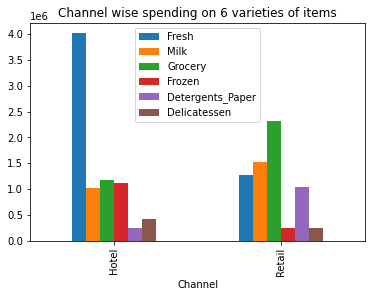

In [7]:
wholesale21=wholesale.drop('Buyer/Spender',axis=1)
wholesale22=wholesale11.drop('Total',axis=1)
plt.figure(figsize=(20,8))
wholesale12.groupby('Channel').sum().plot(kind='bar')
plt.title('Channel wise spending on 6 varieties of items')

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [43]:
wholesale_cv=wholesale.drop(['Buyer/Spender','Total'],axis=1)
wholesale_cv

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [44]:
wholesale1= pd.DataFrame(wholesale_cv.describe().T)
wholesale1['CV']=wholesale1['std']/wholesale1['mean']
wholesale1

,count,mean,std,min,25%,50%,75%,max,CV
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407


# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

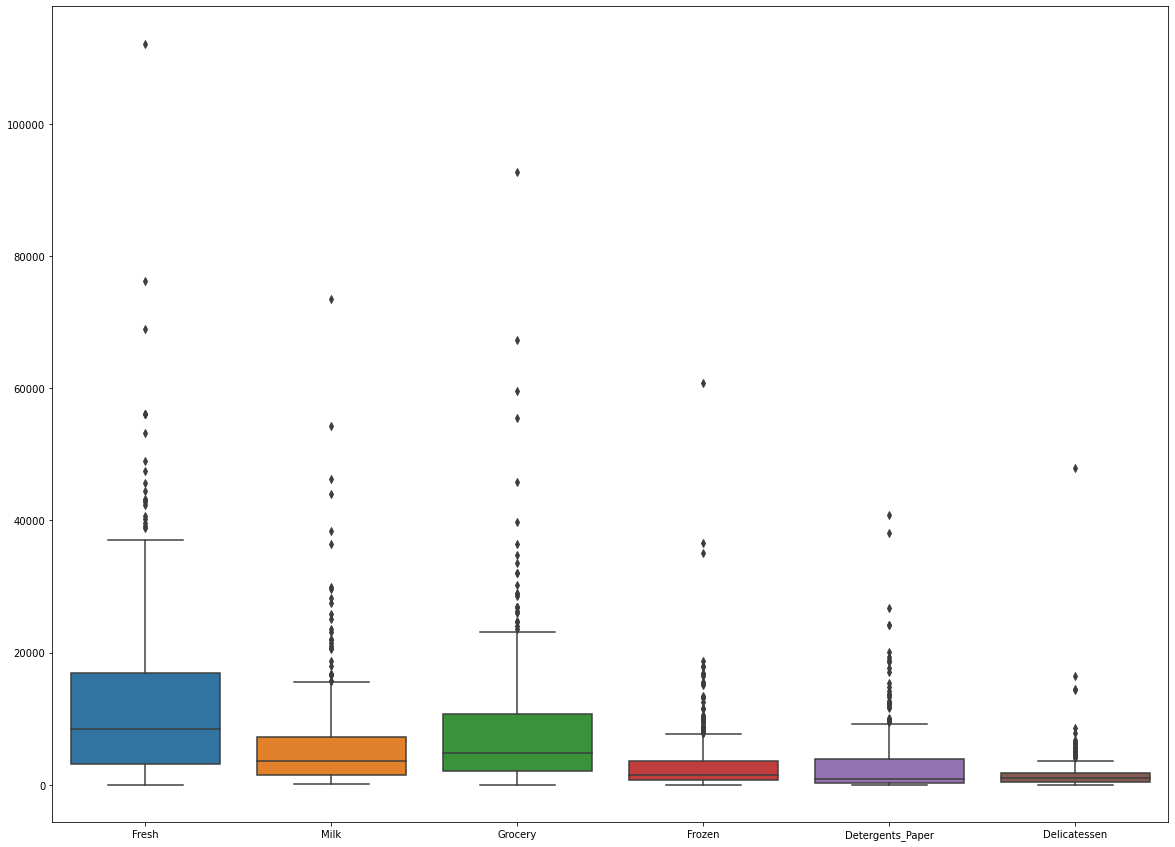

In [46]:
plt.figure(figsize=(20,15))
sns.boxplot(data=wholesale_cv)

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

* Distributor should highly concentrate on ‘Oporto’ region on every item as there is huge difference in spendings compared to ‘Other’ region. Same for ‘Lisbon’ also
* Even though ‘Fresh’ item is highly spent overall, but inconsistency among two channels, distributor need to focus in this area and rectify it, same kind of inconsistency for ‘Frozen’ and ‘Detergents paper’ also
* ‘Delicatessen’ is having most inconsistency overall, need to focus more on this item compared other 5 items

# Problem 2 
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).




In [46]:
UG = pd.read_csv('Survey-1.csv')
UG.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [49]:
UG.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [6]:

UG.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

There are no missing values in the dataset

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

# 2.1.1. Gender and Major

In [7]:
pd.crosstab(UG['Gender'],UG['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.1.2. Gender and Grad Intention


In [28]:
pd.crosstab(UG['Gender'],UG['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# 2.1.3. Gender and Employment


In [9]:
pd.crosstab(UG['Gender'],UG['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.1.4. Gender and Computer


In [10]:
pd.crosstab(UG['Gender'],UG['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?


In [11]:
UG['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [61]:
len(UG['Gender'])


62

In [66]:
print('Probability that a randomly selected CMSU student will be male is', round(29/62,2))

Probability that a randomly selected CMSU student will be male is 0.47


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?


In [67]:
print('Probability that a randomly selected CMSU student will be female is', round(33/62,2))
round

Probability that a randomly selected CMSU student will be female is 0.53


<function round(number, ndigits=None)>

# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.


In [14]:
pd.crosstab(UG['Gender'],UG['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [75]:
print('Probability of different majors among the male students in CMSU are as below:')
print('Probability of "Accounting" is', round(4/29,2))
print('Probability of "CIS" is', round(1/29,2))
print('Probability of "Economics/Finance" is', round(4/29,2))
print('Probability of "International Business" is', round(2/29,2))
print('Probability of "Management" is', round(6/29,2))
print('Probability of "Other" is', round(4/29,2))
print('Probability of "Retailing/Marketing" is', round(5/29,2))
print('Probability of "Undecided" is', round(3/29,2))

Probability of different majors among the male students in CMSU are as below:
Probability of "Accounting" is 0.14
Probability of "CIS" is 0.03
Probability of "Economics/Finance" is 0.14
Probability of "International Business" is 0.07
Probability of "Management" is 0.21
Probability of "Other" is 0.14
Probability of "Retailing/Marketing" is 0.17
Probability of "Undecided" is 0.1


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.


In [81]:
print('Probability of different majors among the female students in CMSU are as below:')
print('Probability of "Accounting" is', round(3/33,2))
print('Probability of "CIS" is', round(3/33,2))
print('Probability of "Economics/Finance" is', round(7/33,2))
print('Probability of "International Business" is', round(4/33,2))
print('Probability of "Management" is', round(4/33,2))
print('Probability of "Other" is', round(3/33,2))
print('Probability of "Retailing/Marketing" is', round(9/33,2))
print('Probability of "Undecided" is', 0/33)

Probability of different majors among the female students in CMSU are as below:
Probability of "Accounting" is 0.09
Probability of "CIS" is 0.09
Probability of "Economics/Finance" is 0.21
Probability of "International Business" is 0.12
Probability of "Management" is 0.12
Probability of "Other" is 0.09
Probability of "Retailing/Marketing" is 0.27
Probability of "Undecided" is 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:


# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.


In [34]:
pd.crosstab(UG['Gender'],UG['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [82]:
print('Probability that a randomly chosen student is a male and intends to graduate is', round(17/62 ,2))

Probability that a randomly chosen student is a male and intends to graduate is 0.27


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 


In [39]:
pd.crosstab(UG['Gender'],UG['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [83]:
print('Probability that a randomly selected student is a female and does NOT have a laptop', round(4/62,2) )

Probability that a randomly selected student is a female and does NOT have a laptop 0.06


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?


In [51]:
pd.crosstab(UG['Gender'],UG['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [84]:
print('probability that a randomly chosen student is a male or has full time employment is', round(32/62,2))

probability that a randomly chosen student is a male or has full time employment is 0.52


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.


Required probability= P(Female and international business)+P(Female and management)

In [53]:
pd.crosstab(UG['Gender'],UG['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [85]:
round(8/33,2)

0.24

# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


In [137]:
UG1=pd.DataFrame(UG[(UG['Grad Intention']=='Yes')])
UG1
UG2=pd.DataFrame(UG[(UG['Grad Intention']=='No')])
UG2
UG3=pd.concat([UG1,UG2])
UG3
pd.crosstab(UG3['Gender'],UG3['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [138]:
UG3['Gender'].value_counts()

Female    20
Male      20
Name: Gender, dtype: int64

In [139]:
UG3['Grad Intention'].value_counts()

Yes    28
No     12
Name: Grad Intention, dtype: int64

In [142]:
print('Probability of grad intention is', 28/40)
print('Probability of being female is', 20/40)

Probability of grad intention is 0.7
Probability of being female is 0.5


In [144]:
print('Probability of grad intention and being female is',11/40)

Probability of grad intention and being female is 0.275


In [145]:
0.7*0.5

0.35

Both are not independent events

# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# Answer the following questions based on the data


# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


Mean of GPA is 3.129 \
standard deviation of GPA is 0.377

In [86]:
z=(3-3.129)/0.377
print('Probability that his/her GPA is less than 3 is', round(stats.norm.cdf(z),2))

Probability that his/her GPA is less than 3 is 0.37


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


In [50]:
pd.crosstab(UG['Gender'],UG['Salary']>=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [88]:
print('probability that a randomly selected male earns 50 or more is', round(14/29,2))
print('probability that a randomly selected female earns 50 or more is', round(18/33,2))

probability that a randomly selected male earns 50 or more is 0.48
probability that a randomly selected female earns 50 or more is 0.55


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.


array([[<AxesSubplot:title={'center':'GPA'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'Spending'}>,
        <AxesSubplot:title={'center':'Text Messages'}>]], dtype=object)

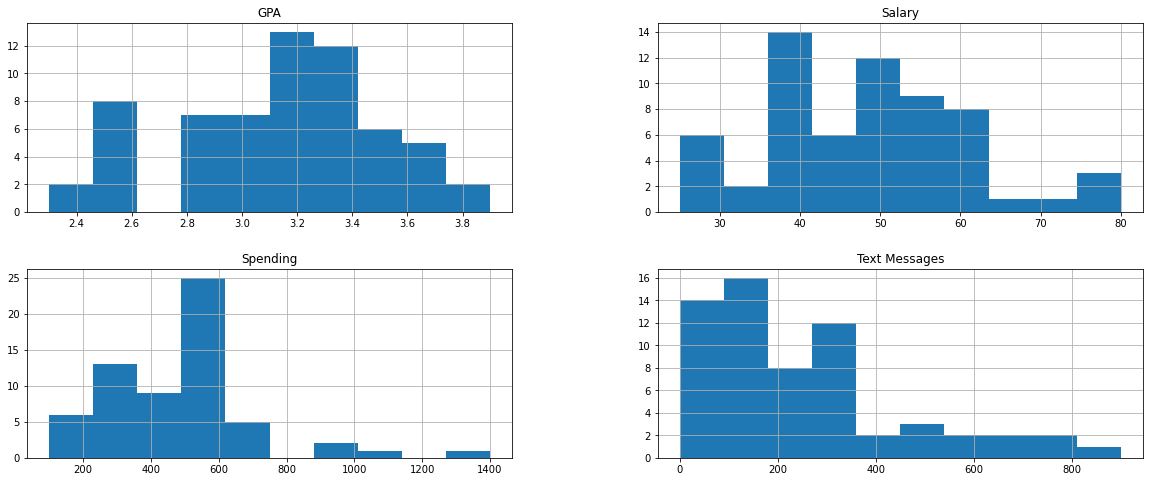

In [27]:
UG[['GPA','Salary','Spending','Text Messages']].hist(figsize=(20,8),)


In [17]:
UG.skew()

C:\Users\sireesha\AppData\Local\Temp/ipykernel_17424/4011725223.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  UG.skew()


ID                   0.000000
Age                  0.736533
GPA                 -0.314600
Salary               0.534701
Social Networking    0.961056
Satisfaction        -0.505437
Spending             1.585915
Text Messages        1.295808
dtype: float64

# Problem 3 
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. \
The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.



In [90]:
shingles=pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [91]:
shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [92]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

There are no missing values in A type shingles, but 5 values are missing in B type shingles

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


We will check separately for both A and B type

In [51]:
#For A type shingles

Step-1:\
H0= Moisture contents of A type shingles is less than or equal to 0.35\
H1= Moisture contents of A type shingles is more to 0.35\
\
$\alpha$=0.05\
\
We do know the standard deviation and n=36, so we will do T-test 1 sample
\


In [57]:
t_statistic, p_value=ttest_1samp(shingles['A'],0.35)
'tvalue: {0}, pvalue: {1}' .format(t_statistic, p_value/2)

'tvalue: -1.4735046253382782, pvalue: 0.07477633144907513'

pvalue is greater than confidence level, so we fail to reject null hypothesis i.e., there is no enough evidence to support that moisture content of A type shingles is less than or equal to 0.35

In [58]:
#For B type shingles

H0= Moisture contents of B type shingles is less than or equal to 0.35\
H1= Moisture contents of B type shingles is more than 0.35\
\
$\alpha$=0.05\
\
We do know the standard deviation and n=36, so we will do T-test 1 sample
\


In [99]:
t_statistic, p_value=ttest_1samp(shingles['B'].dropna(),0.35)
'(tvalue: {0}), pvalue: {1}' .format(t_statistic, p_value/2)

'(tvalue: -3.1003313069986995), pvalue: 0.0020904774003191813'

pvalue is greater than confidence level, so we reject null hypothesis i.e., there is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


H0: mean of A = mean of B\
H1: mean of A not equals to B

confidence interval = 0.05

This is example two sample T-test

In [97]:
t_statistic, p_value  = ttest_ind(shingles['A'],shingles['B'].dropna())
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.289628271966112
P Value 0.2017496571835328


p value is greater than 0.05, so we fail to reject the null hypothesis